Summary:

i. shape: (178, 15)
ii. shape of data (178, 14)
iii. Shape of target (178, 1)
iv. strongest correlations, ('flavanoids', 'total_phenols', 0.8645635000951147), ('od280/od315_of_diluted_wines', 'total_phenols', 0.6999493647911861), ('od280/od315_of_diluted_wines', 'flavanoids', 0.787193901866951)

b. summary of performance models: 
Accuracy: 0.7222222222222222
Precision: 0.6726190476190476
Recall: 0.6726190476190476
F1 Score: 0.6726190476190476

Below completes all the necessary imports for the assignment (make sure you have all needed installed utilizing pip)
most likely needed:
"pip install pandas"
"pip install scikit-learn"
"pip install seaborn"

In [3]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sb

from sklearn.datasets import load_wine
from pandas.plotting import scatter_matrix

C:\Users\Bridl\AppData\Local\Temp\ipykernel_25504\2668554139.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load in wine data

In [4]:
wine_data = load_wine()

Convert the data into pandas dataframe

In [21]:
winepd = pd.DataFrame(data=wine_data['data'], columns=wine_data['feature_names'])

winepd['target'] = wine_data['target']
winepd['target_names'] = winepd['target'].map(lambda x: wine_data['target_names'][x])

#print(winepd.head()) this will print out the overall array

print("Shape of the dataset: ", winepd.shape)

shape_data = winepd.drop(columns=['target']).shape
print("Shape of the Data:", shape_data)

shape_target = winepd[['target']].shape
print("Shape of the Target:", shape_target)

Shape of the dataset:  (178, 15)
Shape of the Data (excluding target variable): (178, 14)
Shape of the Target Variable: (178, 1)


Describe the minimum, maximum, and average values for each of the features and target labels

In [6]:
print("Descriptive statistics for the features and target labels")
winepd.describe()

Descriptive statistics for the features and target labels


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Histogram

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

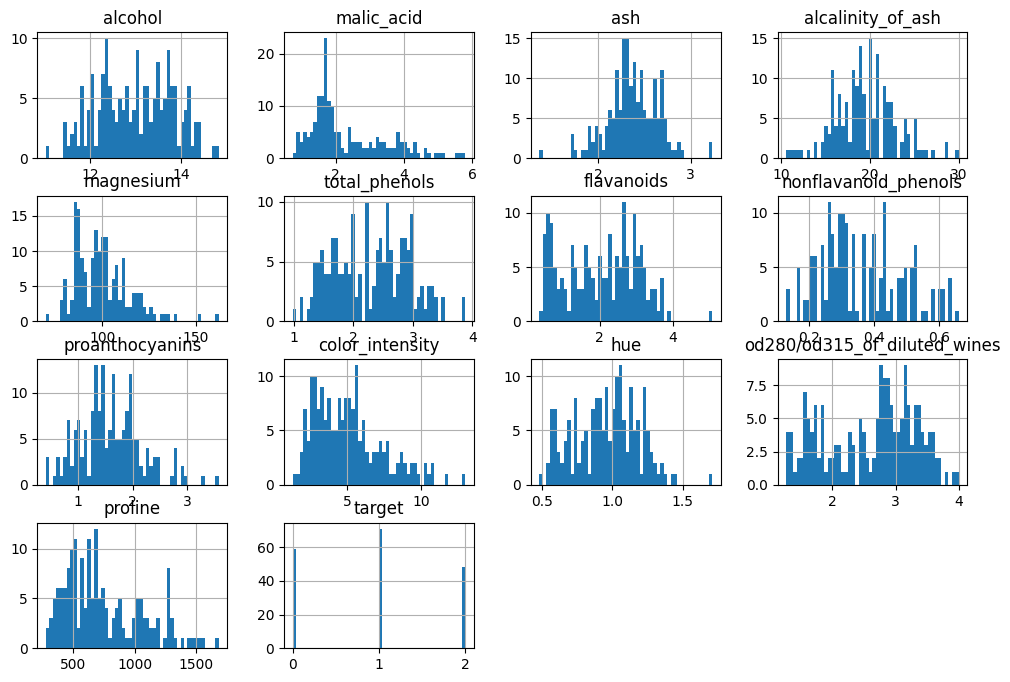

In [7]:
winepd.hist(bins=50, figsize=(12,8))

Draw Scatter matrix

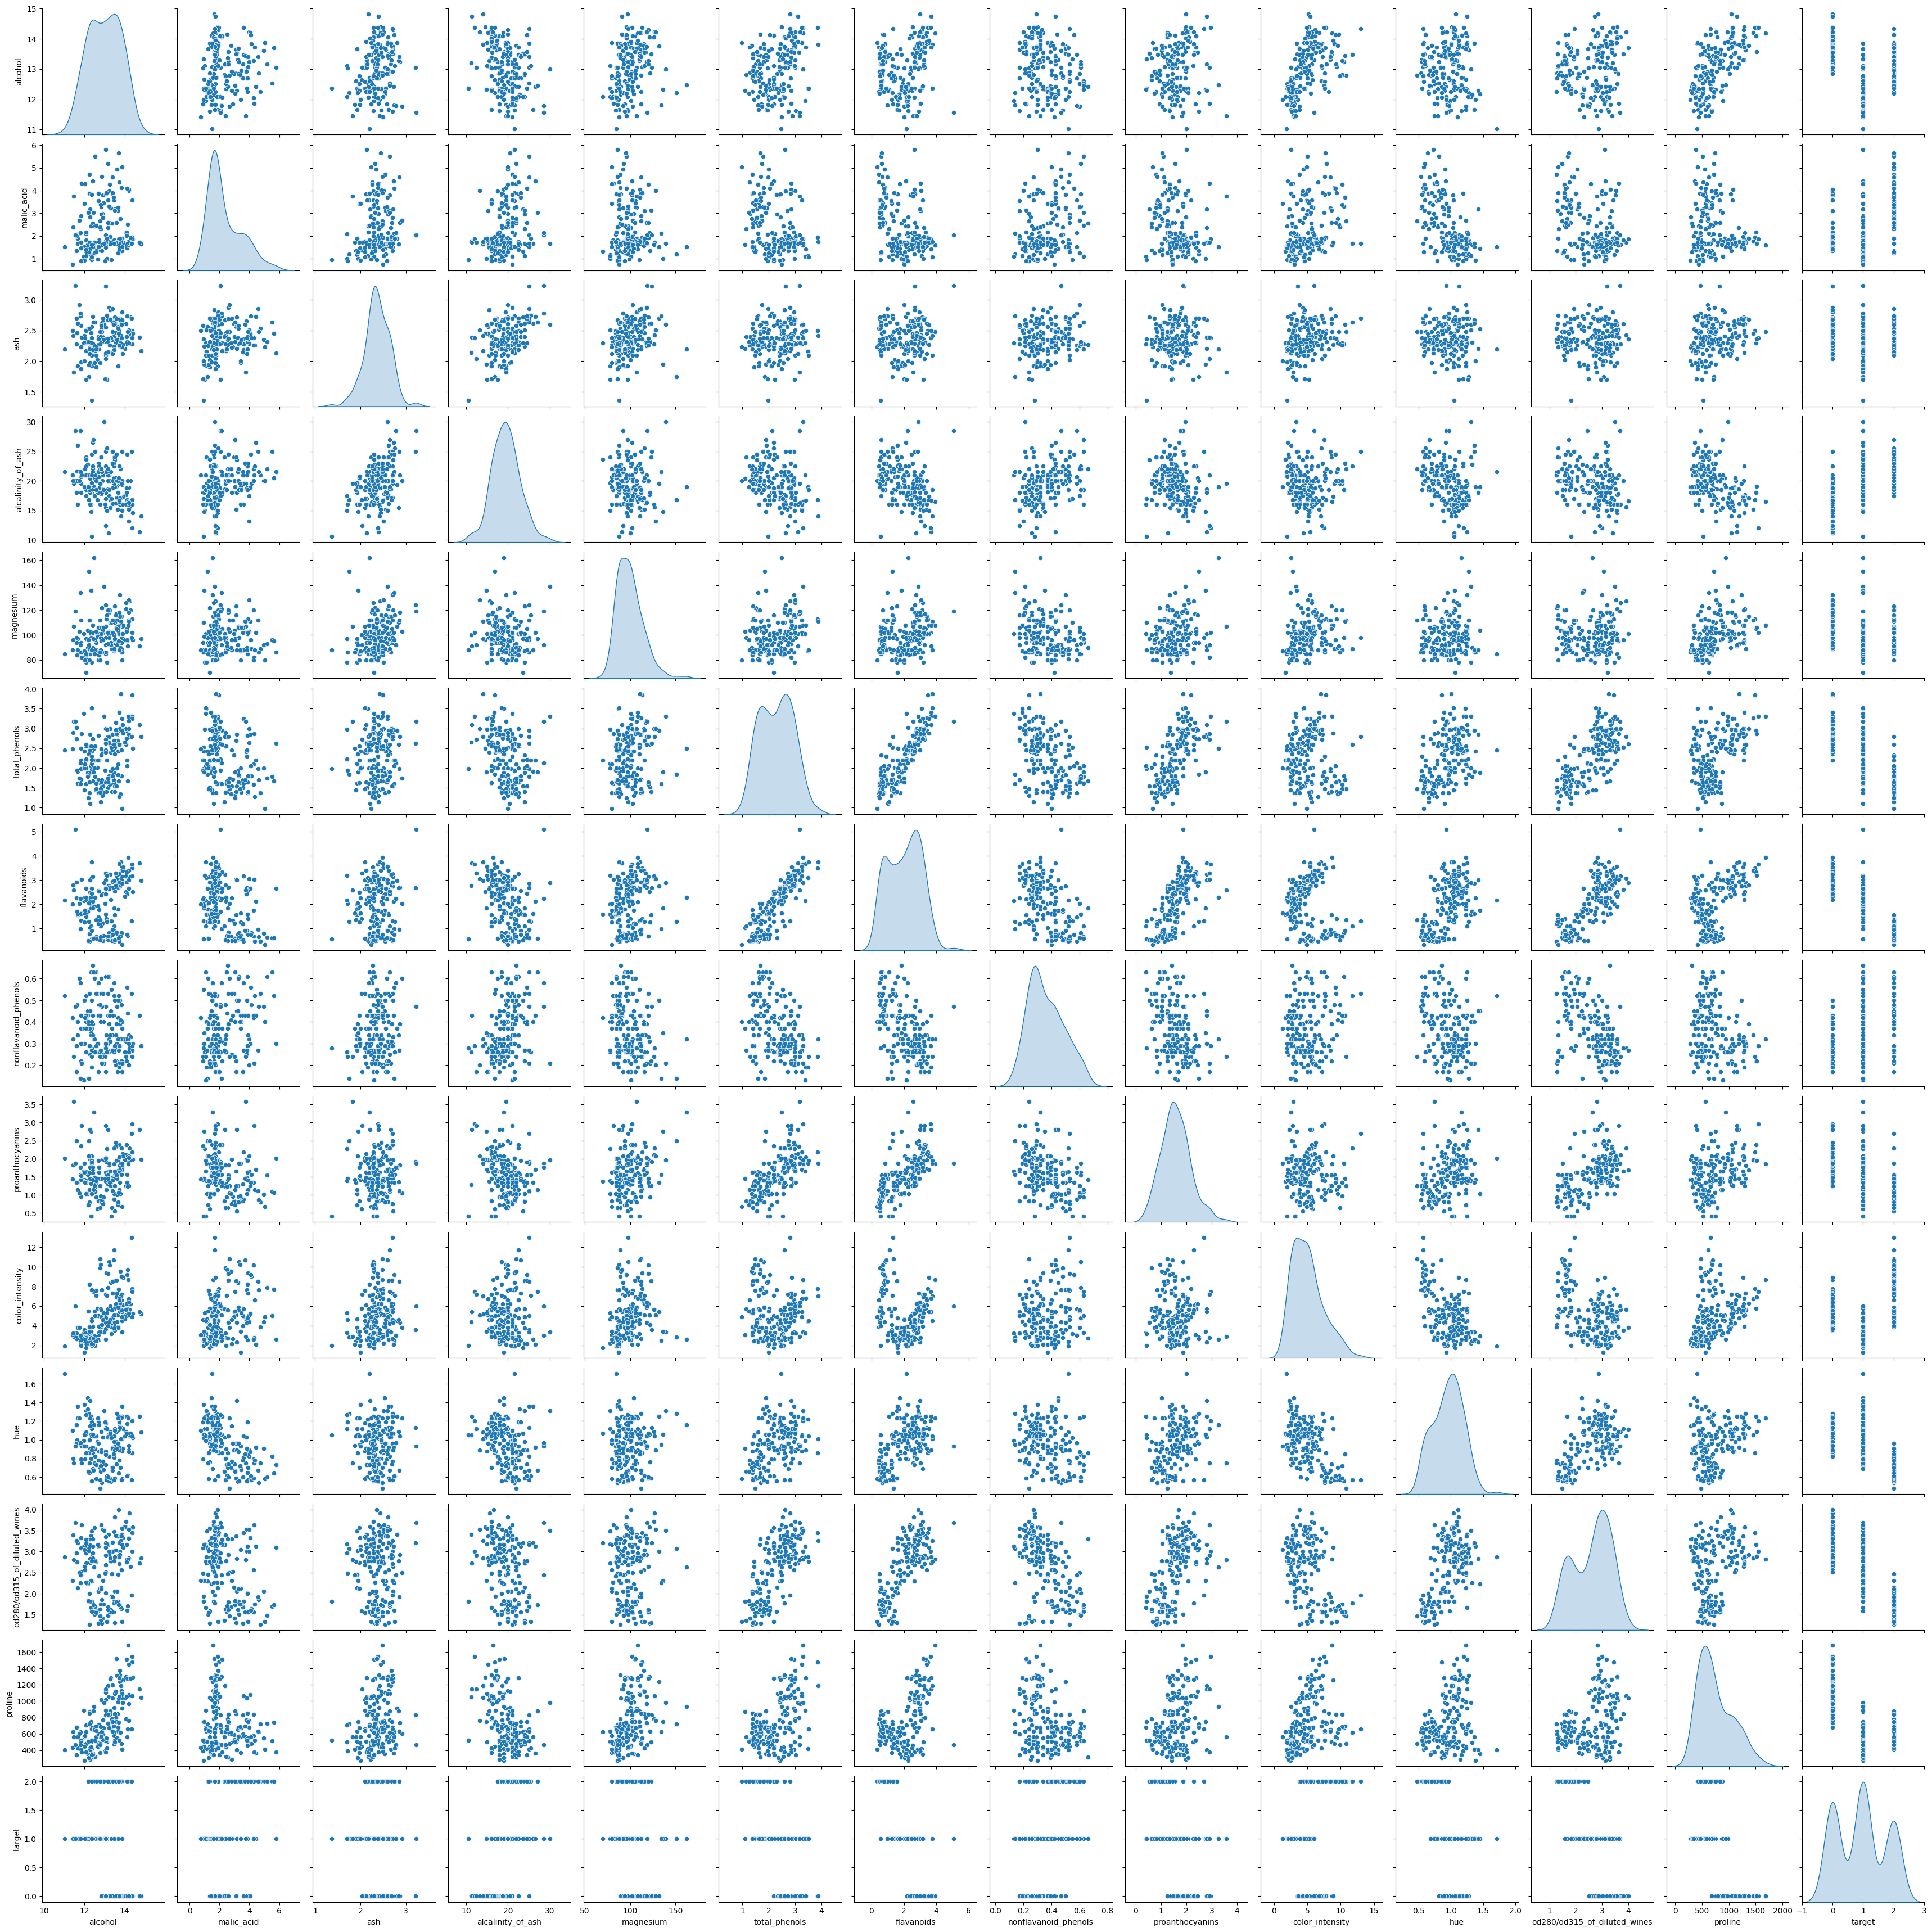

In [8]:
sb.pairplot(winepd, diag_kind="kde")

Execute corr() appropriately and determine if any features strongly correlate

In [24]:
#need to only use the numeric columns for corr()
numeric_columns = winepd.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = winepd[numeric_columns].corr()
#print("Correlaction matrix: \n", correlation_matrix)
print(correlation_matrix)
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > .6:
            strong_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
            
print(strong_corr)

                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                   

Pre-process the data as necessary to ensure that all values can be processed by a
classification model.

In [14]:
null_rows = winepd.isnull().any(axis=1)
winepd.loc[null_rows].head()
#From this we know that there is no null rows

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_names


Create Test set

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wine_data.data, wine_data.target, test_size=.2, random_state=42)

testing?

Accuracy: 0.7222222222222222
Precision: 0.6726190476190476
Recall: 0.6726190476190476
F1 Score: 0.6726190476190476


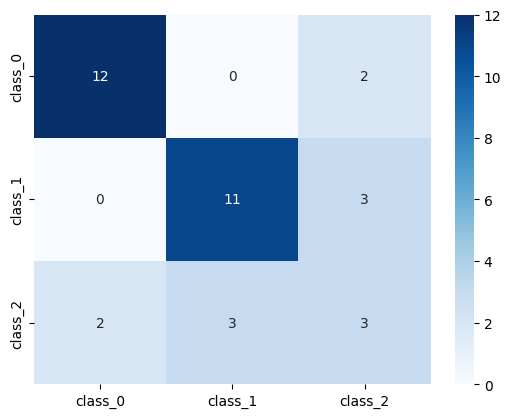

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

conf_matrix = confusion_matrix(y_test,y_pred)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))